In [4]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
from bokeh.transform import jitter
from bokeh.transform import factor_cmap
from bokeh.models.tools import HoverTool
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

In [2]:
output_notebook()

Loading BokehJS ...

In [3]:
df = pd.read_csv("../data/commedia_cantos.csv")
source = ColumnDataSource(df)

p = figure(width=800,
           height=600,
           x_range=['Inferno', 'Purgatorio', 'Paradiso'],
           title='Canto lengths by cantica',
           #x_axis_label='Canto',
           y_axis_label='Num. of verses')

p.title.text_font_size='16pt'
p.title.align='center'
p.xaxis.major_label_text_font_size = "14pt"
# p.xaxis.major_label_text_color = "red"
# p.xaxis.major_label_text_font = "bold italic"

c = p.scatter(source = source,
              x=jitter('cantica', width=0.3, range=p.x_range),
              y='num_verses',
              size = 20,
              fill_color=factor_cmap('cantica',              ## specifies the mpg column
                                 palette=['#8B0000', '#8FBC8F', '#FFFFFF'], ## specifies the color palette
                                 factors=['Inferno','Purgatorio','Paradiso'])
             )

p.add_tools(HoverTool(tooltips=[("Canto", "@canto")],      ## If not set to None a pointless tooltip appears
                      renderers=[c]))     ## Specifies that we want hovering to be on the circles


show(p)

In [ ]:
# looks good now! probably should add labels and stuff to the axes

In [5]:
# now let's try to analyze the rhyme patters. I'll need to grab all the rhyming words (i.e. those with rhyme?=1) 
# and organize them by their final 3 letters
df = pd.read_csv("../data/commedia.csv")
source = ColumnDataSource(df)

In [6]:
def remove_accents(s):
    return s.replace('ò', 'o').replace('ì', 'i').replace('é', 'e').replace('ï', 'i').replace('ù', 'u').replace('è','e')

In [18]:
# it's still not perfect, but much better now. a bit more manual tweaking ought to get it close enough
rhyme_schemes = []
vowels = ['a','e','i','o','u', 'ò', 'ì', 'ï', 'é', 'ù', 'è']
for index, row in df.iterrows():
    if row['rhyme?'] == 0:
        rhyme_schemes.append(None)
    else:
        word = row['word']
        # just removing appostrophe's from the end of words. maybe add a flag to add them back
        if word[-1] == "'":
            word = word[:-1]
        if (word[-1] in vowels) and (word[-2] in vowels):
            rhyme_scheme = word[-2:]
        elif len(word)<=3:
            rhyme_scheme = word[-2:]
        elif word[-3] not in vowels:
            if word[-4] not in vowels:
                rhyme_scheme = word[-5:]
            else:
                rhyme_scheme = word[-4:]
        else:
            rhyme_scheme = word[-3:]

        rhyme_schemes.append(rhyme_scheme)


vita
oscura
smarrita
dura
forte
paura
morte
trovai
scorte
v'intrai
punto
abbandonai
giunto
valle
compunto
spalle
pianeta
calle
queta
durata
pieta
affannata
riva
guata
fuggiva
passo
viva
lasso
diserta
basso
l'erta
molto
coverta
volto
cammino
vòlto
mattino
stelle
divino
belle
cagione
pelle
stagione
desse
leone
venisse
fame
tremesse
brame
magrezza
grame
gravezza
vista
l'altezza
acquista
face
s'attrista
pace
poco
poco
tace
loco
offerto
fioco
diserto
lui
fui
lombardi
ambedui
tardi
augusto
bugiardi
giusto
troia
combusto
noia
monte
fonte
fronte
lume
amore
volume
autore
tolsi
onore
volsi
saggio
vide
selvaggio
gride
via
l'uccide
ria
voglia
pria
s'ammoglia
veltro
doglia
peltro
virtute
feltro
feltro
salute
cammilla
ferute
villa
'nferno
dipartilla
discerno
guida
etterno
strida
dolenti
grida
contenti
venire
genti
salire
degna
partire
regna
legge
vegna
regge
seggio
richeggio
conoscesti
peggio
dicesti
pietro
dietro
bruno
terra
uno
guerra
pietate
erra
m'aiutate
vidi
nobilitate
guidi
possente
fidi
pare

eretto
rotta
goccia
grotta
diroccia
flegetonta
doccia
dismonta
stagno
rigagno
mondo
tondo
molto
fondo
vòlto
nova
trova
taci
rossa
faci
fossa
lavarsi
scostarsi
vegne
arsi
margini
aduggia
argini
bruggia
s'avventa
fuggia
brenta
castelli
senta
quelli
grossi
félli
rimossi
era
fossi
schiera
ciascuna
sera
luna
ciglia
cruna
famiglia
prese
distese
aspetto
difese
'ntelletto
faccia
dispiaccia
teco
preco
m'asseggia
greggia
anni
feggia
panni
masnada
strada
chino
vada
destino
mena
valle
piena
spalle
quella
stella
porto
bella
morto
benigno
conforto
maligno
antico
macigno
nimico
sorbi
fico
orbi
superba
forbi
serba
fame
l'erba
strame
pianta
letame
santa
quando
ancora
bando
m'accora
paterna
ora
ora
s'etterna
vivo
scerna
scrivo
testo
arrivo
manifesto
garra
presto
arra
rota
gota
riguardommi
vommi
sono
sommi
buono
tacerci
suono
cherci
fama
lerci
grama
vedervi
brama
servi
bacchiglione
nervi
sermone
veggio
sabbione
deggio
tesoro
coloro
verde
costoro
perde
rimbombo
giro
rombo
partiro
passava
martiro
gridava
s

venìa
cima
n'uscia
prima
dritto
lima
l'afflitto
rame
trafitto
forame
linguaggio
grame
vïaggio
guizzo
passaggio
drizzo
lombardo
t'adizzo'
tardo
meco
ardo
cieco
terra
reco
guerra
orbino
chino
costa
risposta
incominciai
nascosta
mai
tiranni
lasciai
anni
cova
vanni
prova
mucchio
ritrova
verrucchio
governo
succhio
santerno
bianco
verno
fianco
monte
franco
conte
stato
rugghiato
mosse
fiato
fosse
mondo
scosse
fondo
vero
rispondo
cordigliero
ammenda
intero
prenda
colpe
m'intenda
polpe
mie
volpe
vie
arte
uscie
parte
dovrebbe
sarte
m'increbbe
rendei
sarebbe
farisei
laterano
giudei
cristiano
acri
soldano
sacri
capestro
macri
silvestro
lebbre
maestro
febbre
tacetti
ebbre
sospetti
fare
getti
diserrare
chiavi
care'
gravi
peggio
lavi
deggio
corto
seggio'
morto
cherubini
torto
meschini
frodolente
crini
pente
puossi
consente'
riscossi
'forse
fossi'
attorse
duro
morse
furo'
perduto
compiuto
partio
aguto
mio
arco
fio
carco
sciolte
pieno
volte
meno
mente
seno
gente
terra
dolente
guerra
spoglie
erra
doglie

negligente
mente
coscia
angoscia
lena
poscia
pena
sole
parole
riso
dole
assiso
iscorta
porta
martìri
porta
m'aggiri
vita
sospiri
m'aita
viva
saliva
tocco
riva
partito
duca
dito
luca
sotto
motto
maraviglia
rotto
allenti
pispiglia
genti
crolla
venti
rampolla
segno
consperso
degno
traverso
poco
verso
verso
loco
raggi
roco
messaggi
dimandarne
andarne
mandaro
carne
restaro
risposto
tosto
sereno
d'agosto
meno
volta
freno
molta
poeta
lieta
queta
vedesti
porti
t'arresti
morti
ora
accorti
fora
pacificati
guati
piace
nati
pace
guida
fida
giurarlo
ricida
parlo
paese
carlo
cortese
s'adori
offese
fóri
sedea
antenori
credea
ira
volea
mira
orïaco
spira
braco
io
disio
monte
mio
bonconte
cura
ventura
campaldino
casentino
l'archiano
apennino
vano
gola
piano
parola
quivi
sola
vivi
d'inferno
privi
l'etterno
toglie
governo'
raccoglie
riede
coglie
chiede
vento
diede
spento
coperse
intento
converse
venne
sofferse
convenne
veloce
ritenne
foce
sospinse
croce
vinse
fondo
mondo
secondo
pia
maremma
pria
zara
dole

vere
errori
vedere
slega
tenere
lega
avvolte
m'ascolte
m'apparve
larve
chiuse
parve
scuse
pace
diffuse
face
vede
giace
piede
lenti
attenti
allungarsi
lucenti
farsi
oscuro
cansarsi
puro
privata
cielo
tenebrata
velo
coperse
pelo
sofferse
fida
m'offerse
guida
cozzo
ancida
sozzo
diceva
pareva
misericordia
leva
essordia
modo
concordia
apprendi
fendi
tue
fue
mondi
fece
lascia
fascia
suso
ambascia
rinchiuso
corte
uso
morte
varco
marco
amai
l'arco
prego
lego
scoppio
spiego
doppio
certo
l'accoppio
diserto
sone
coverto
cagione
altrui
lui
recate
tutto
necessitate
distrutto
giustizia
lutto
inizia
dica
malizia
fatica
dura
notrica
natura
cria
cura
disvia
cheggia
spia
vagheggia
fanciulla
pargoleggia
nulla
fattore
trastulla
sapore
corre
amore
porre
discernesse
torre
esse
procede
fesse
vede
ghiotta
chiede
condotta
reo
corrotta
feo
strada
deo
spada
insieme
vada
teme
spiga
seme
riga
trovarsi
briga
passarsi
vergogna
d'appressarsi
rampogna
tardo
ripogna
gherardo
noma
lombardo
roma
reggimenti
argomenti
reta

ciglio
riguardolla
vermiglio
solla
nome
rampolla
sorrise
pome
mise
retro
divise
vetro
rinfrescarmi
metro
confortarmi
andava
cantava
lei
montava
era
potei
sera
passo
sasso
raggi
basso
saggi
spense
saggi
immense
aspetto
dispense
letto
affranse
diletto
manse
proterve
pranse
ferve
verga
serve
alberga
pernotta
sperga
allotta
pastori
grotta
fori
stelle
maggiori
quelle
sovente
novelle
l'orïente
citerea
ardente
parea
landa
dicea
dimanda
intorno
ghirlanda
m'addorno
smaga
giorno
vaga
mani
antelucani
grati
lontani
lati
leva'mi
levati
rami
mortali
cotali
strenne
iguali
venne
poi
penne
noi
superno
suoi
l'etterno
parte
discerno
arte
duce
l'arte
riluce
arbuscelli
produce
belli
fenno
elli
cenno
arbitrio
senno
dintorno
viva
giorno
riva
lento
lento
auliva
mutamento
fronte
vento
pronte
parte
monte
sparte
cime
arte
prime
foglie
rime
raccoglie
chiassi
discioglie
passi
ch'io
'ntrassi
rio
onde
uscìo
monde
alcuna
nasconde
bruna
bruna
mai
luna
passai
mirare
mai
appare
disvia
pensare
gia
fiore
via
d'amore
sembi

piacque
fattore
persona
amore
ragiona
unita
buona
sbandita
torse
vita
porse
misura
morse
ingiura
sofferse
natura
diverse
morte
s'aperse
forte
vendetta
corte
ristretta
nodo
s'aspetta
odo
occulto
modo'
sepulto
ingegno
adulto
segno
discerne
degno
sperne
sfavilla
etterne
distilla
move
sigilla
piove
soggiace
nove
piace
raggia
vivace
s'avvantaggia
manca
caggia
disfranca
bene
s'imbianca
rivene
vòta
pene
tota
dignitadi
remota
badi
via
guadi
cortesia
isso
follia
l'abisso
puoi
fisso
suoi
giuso
poi
suso
fue
dischiuso
sue
vita
amendue
gradita
appresenta
uscita
imprenta
vie
contenta
die
processo
fie
stesso
rilevarsi
dimesso
scarsi
dio
incarnarsi
disio
loco
io
foco
misture
poco
creature
vero
sicure'
sincero
creati
intero
nomati
fanno
informati
hanno
informante
vanno
piante
tira
sante
spira
innamora
disira
ancora
ripensi
allora
periclo
amore
epiciclo
onore
grido
errore
cupido
figlio
dido
piglio
stella
ciglio
ella
fede
bella
vede
discerne
riede
lucerne
correnti
interne
venti
festini
lenti
divini
giro


cetra
pertugio
penètra
indugio
salissi
bugio
uscissi
parole
scrissi
sole
incominciommi
vole
fommi
scintilla
sommi
pupilla
santo
villa
villa
canto
consiglio
altrettanto
ciglio
s'accosta
figlio
costa
l'esperïenza
l'opposta
circunferenza
superno
penitenza
etterno
preco
l'odïerno
meco
frutto
greco
dedutto
nocivo
distrutto
declivo
plora
vivo
s'innamora
sembiante
ancora
errante
tondo
sante
mondo
grazia
spazia
contenta
sazia
'mprenta
disio
diventa
mio
veste
patio
peso
feste
acceso
rispuose
sospeso
cose
come
ascose
nome
quiditate
prome
pate
speranza
volontate
sobranza
vinta
beninanza
quinta
vedi
dipinta
credi
fede
piedi
riede
l'ossa
mercede
possa
suscitarla
mossa
parla
poco
aiutarla
foco
seconda
gioco
profonda
creatura
onda
drittura
aperse
futura
sofferse
paganesmo
perverse
battesmo
rota
millesmo
remota
aspetti
tota
stretti
vedemo
eletti
scemo
s'affina
divina
vista
medicina
citarista
corda
acquista
ricorda
benedette
concorda
fiammette
volto
essi
tolto
quale
fessi
scale
s'accende
sale
splende
f

stanno
visi
scanno
scanni
fanno
giovanni
martiro
anni
sortiro
augustino
giro
giro
divino
fede
giardino
fiede
discrezioni
siede
condizioni
asciolti
elezïoni
volti
püerili
ascolti
sili
legame
sottili
reame
sito
fame
stabilito
giustamente
dito
gente
causa
eccellente
pausa
diletto
ausa
aspetto
dota
l'effetto
nota
gemelli
commota
capelli
lume
s'incappelli
costume
differenti
acume
recenti
salute
parenti
compiute
penne
virtute
venne
cristo
ritenne
cristo
chiarezza
allegrezza
sante
altezza
davante
sospese
sembiante
discese
distese
cantilena
corte
serena
comporte
loco
sorte
gioco
regina
dottrina
maria
mattutina
leggiadria
alma
sia
palma
dio
salma
io
patrici
pio
felici
agusta
radici
s'aggiusta
gusto
gusta
vetusto
chiavi
venusto
gravi
sposa
clavi
posa
manna
retrosa
anna
figlia
osanna
famiglia
donna
ciglia
t'assonna
sartore
gonna
amore
penètri
fulgore
t'arretri
oltrarti
s'impetri
aiutarti
l'affezione
orazione
figlio
creatura
consiglio
natura
fattore
fattura
l'amore
pace
fiore
face
mortali
vivace
v

In [22]:
df['rhyme_scheme'] = rhyme_schemes
df.to_csv('../data/commedia.csv', index=False)

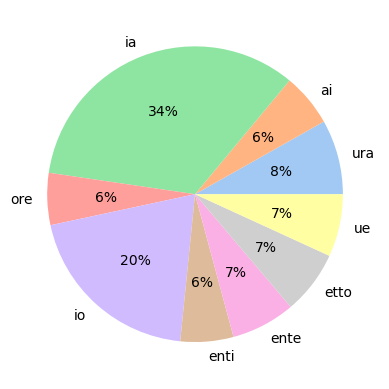

In [9]:
# there's a lot of rhyme schemes, so only grab those ones with lots of words
# there's probably a better way to draw this
data = [len(rhymes[key]) for key in rhymes if len(rhymes[key]) > 100]
labels = [key for key in rhymes if len(rhymes[key]) > 100 ]
#turns out this is only 15% of the words, so i'll have to make this better

# sum_total_of_others=0
# for key in rhymes:
#     if (len(rhymes[key]) <= 150):
#         sum_total_of_others+= len(rhymes[key])
        
# data.append(sum_total_of_others)
# labels.append("other")
# Define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:len(data)]

# Create pie chart
plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%')
plt.show()

In [ ]:
# now let's try to compare two cantos with this Jaccard similarity

In [1]:
# italian words that are "uninteresting"
stop_words = [
    'a', 'abbastanza', 'abbia', 'abbiamo', 'abbiano', 'abbiate', 'accidenti', 'ad', 'adesso', 'affinché', 'agl', 'agli',
    'ahime', 'ahimè', 'ai', 'al', 'alcuna', 'alcuni', 'alcuno', 'all', 'alla', 'alle', 'allo', 'allora', 'altre', 'altri',
    'altrimenti', 'altro', 'altrove', 'altrui', 'anche', 'ancora', 'anni', 'anno', 'ansa', 'anticipo', 'assai', 'attesa',
    'attraverso', 'avanti', 'avemmo', 'avendo', 'avente', 'aver', 'avere', 'averlo', 'avesse', 'avessero', 'avessi',
    'avessimo', 'aveste', 'avesti', 'avete', 'aveva', 'avevamo', 'avevano', 'avevate', 'avevi', 'avevo', 'avrai',
    'avranno', 'avrebbe', 'avrebbero', 'avrei', 'avremmo', 'avremo', 'avreste', 'avresti', 'avrete', 'avrà', 'avrò',
    'avuta', 'avute', 'avuti', 'avuto', 'basta', 'ben', 'bene', 'benissimo', 'brava', 'bravo', 'buono', 'c', 'caso',
    'cento', 'certa', 'certe', 'certi', 'certo', 'che', 'chi', 'chicchessia', 'chiunque', 'ci', 'ciascuna', 'ciascuno',
    'cima', 'cinque', 'cio', 'cioe', 'cioè', 'circa', 'citta', 'città', 'ciò', 'co', 'codesta', 'codesti', 'codesto',
    'Cogli', 'coi', 'col', 'colei', 'coll', 'coloro', 'colui', 'come', 'cominci', 'comprare', 'comunque', 'con',
    'concernente', 'conclusione', 'consecutivi', 'consecutivo', 'consiglio', 'contro', 'cortesia', 'cos', 'cosa',
    'cosi', 'così', 'cui', 'd', 'da', 'dagl', 'dagli', 'dai', 'dal', 'dall', 'dalla', 'dalle', 'dallo', 'dappertutto',
    'davanti', 'degl', 'degli', 'dei', 'del', 'dell', 'della', 'delle', 'dello', 'dentro', 'detto', 'deve', 'devo',
    'di', 'dice', 'dietro', 'dire', 'dirimpetto', 'diventa', 'diventare', 'diventato', 'dopo', 'doppio', 'dov', 'dove',
    'dovra', 'dovrà', 'dovunque', 'due', 'dunque', 'durante', 'e', 'ebbe', 'ebbero', 'ebbi', 'ecc', 'ecco', 'ed',
    'effettivamente', 'egli', 'ella', 'entrambi', 'eppure', 'era', 'erano', 'eravamo', 'eravate', 'eri', 'ero',
    'esempio', 'esse', 'essendo', 'esser', 'essere', 'essi', 'ex', 'fa', 'faccia', 'facciamo', 'facciano', 'facciate',
    'faccio', 'facemmo', 'facendo', 'facesse', 'facessero', 'facessi', 'facessimo', 'faceste', 'facesti', 'faceva',
    'facevamo', 'facevano', 'facevate', 'facevi', 'facevo', 'fai', 'fanno', 'farai', 'faranno', 'fare', 'farebbe',
    'farebbero', 'farei', 'faremmo', 'faremo', 'fareste', 'faresti', 'farete', 'farà', 'farò', 'fatto', 'favore',
    'fece', 'fecero', 'feci', 'fin', 'finalmente', 'finche', 'fine', 'fino', 'forse', 'forza', 'fosse', 'fossero',
    'fossi', 'fossimo', 'foste', 'fosti', 'fra', 'frattempo', 'fu', 'fui', 'fummo', 'fuori', 'furono', 'futuro',
    'generale', 'gente', 'gia', 'giacche', 'giorni', 'giorno', 'giu', 'già', 'gli', 'gliela', 'gliele', 'glieli',
    'glielo', 'gliene', 'grande', 'grazie', 'gruppo', 'ha', 'haha', 'hai', 'hanno', 'ho', 'i', 'ie', 'ieri', 'il',
    'improvviso', 'in', 'inc', 'indietro', 'infatti', 'inoltre', 'insieme', 'intanto', 'intorno', 'invece', 'io', 'l', "'l"
    'la', 'lasciato', 'lato', 'le', 'lei', 'li', 'lo', 'lontano', 'loro', 'lui', 'lungo', 'luogo', 'là', 'ma', 'macche',
    'magari', 'maggior', 'mai', 'male', 'malgrado', 'malissimo', 'me', 'medesimo', 'mediante', 'meglio', 'meno',
    'mentre', 'mesi', 'mezzo', 'mi', 'mia', 'mie', 'miei', 'mila', 'miliardi', 'milioni', 'minimi', 'mio', 'modo',
    'molta', 'molti', 'moltissimo', 'molto', 'momento', 'mondo', 'ne', 'negl', 'negli', 'nei', 'nel', 'nell', 'nella',
    'nelle', 'nello', 'nemmeno', 'neppure', 'nessun', 'nessuna', 'nessuno', 'niente', 'no', 'noi', 'nome', 'non',
    'nondimeno', 'nonostante', 'nonsia', 'nostra', 'nostre', 'nostri', 'nostro', 'novanta', 'nove', 'nulla', 'nuovi',
    'nuovo', 'o', 'od', 'oggi', 'ogni', 'ognuna', 'ognuno', 'oltre', 'oppure', 'ora', 'ore', 'osi', 'ossia', 'ottanta',
    'otto', 'paese', 'parecchi', 'parecchie', 'parecchio', 'parte', 'partendo', 'peccato', 'peggio', 'per', 'perche',
    'perchè', 'perché', 'percio', 'perciò', 'perfino', 'pero', 'persino', 'persone', 'però', 'piedi', 'pieno', 'piglia',
    'piu', 'piuttosto', 'più', 'po', 'pochissimo', 'poco', 'poi', 'poiche', 'possa', 'possedere', 'posteriore', 'posto',
    'potrebbe', 'preferibilmente', 'presa', 'press', 'prima', 'primo', 'principalmente', 'probabilmente', 'promesso',
    'proprio', 'puo', 'pure', 'purtroppo', 'può', 'qua', 'qualche', 'qualcosa', 'qualcuna', 'qualcuno', 'quale', 'quali',
    'qualunque', 'quando', 'quanta', 'quante', 'quanti', 'quanto', 'quantunque', 'quarto', 'quasi', 'quattro', 'quel',
    'quella', 'quelle', 'quelli', 'quello', 'quest', 'questa', 'queste', 'questi', 'questo', 'qui', 'quindi', 'quinto',
    'realmente', 'recente', 'recentemente', 'registrazione', 'relativo', 'riecco', 'rispetto', 'salvo', 'sara', 'sarai',
    'saranno', 'sarebbe', 'sarebbero', 'sarei', 'saremmo', 'saremo', 'sareste', 'saresti', 'sarete', 'sarà', 'sarò',
    'scola', 'scopo', 'scorso', 'se', 'secondo', 'seguente', 'seguito', 'sei', 'sembra', 'sembrare', 'sembrato',
    'sembrava', 'sembri', 'sempre', 'senza', 'sette', 'si', 'sia', 'siamo', 'siano', 'siate', 'siete', 'sig', 'solito',
    'solo', 'soltanto', 'sono', 'sopra', 'soprattutto', 'sotto', 'spesso', 'sta', 'stai', 'stando', 'stanno', 'starai',
    'staranno', 'starebbe', 'starebbero', 'starei', 'staremmo', 'staremo', 'stareste', 'staresti', 'starete', 'starà',
    'starò', 'stata', 'state', 'stati', 'stato', 'stava', 'stavamo', 'stavano', 'stavate', 'stavi', 'stavo', 'stemmo',
    'stessa', 'stesse', 'stessero', 'stessi', 'stessimo', 'stesso', 'steste', 'stesti', 'stette', 'stettero', 'stetti',
    'stia', 'stiamo', 'stiano', 'stiate', 'sto', 'su', 'sua', 'subito', 'successivamente', 'successivo', 'sue', 'sugl',
    'sugli', 'sui', 'sul', 'sull', 'sulla', 'sulle', 'sullo', 'suo', 'suoi', 'tale', 'tali', 'talvolta', 'tanto', 'te',
    'tempo', 'terzo', 'th', 'ti', 'titolo', 'tra', 'tranne', 'tre', 'trenta', 'triplo', 'troppo', 'trovato', 'tu', 'tua',
    'tue', 'tuo', 'tuoi', 'tutta', 'tuttavia', 'tutte', 'tutti', 'tutto', 'uguali', 'ulteriore', 'ultimo', 'un', 'una',
    'uno', 'uomo', 'va', 'vai', 'vale', 'vari', 'varia', 'varie', 'vario', 'verso', 'vi', 'vicino', 'visto', 'vita', 'voi',
    'volta', 'volte', 'vostra', 'vostre', 'vostri', 'vostro', 'è', 'or'
]

In [11]:
# jaccard_similarity is a bit naive i think, but it's easy enough to implement
def jaccard_similarity(list1, list2):
    # convert to list to remove duplicates
    set1 = set(list1)
    set2 = set(list2)
    
    for word in stop_words:
        set1.discard(word)
        set2.discard(word)
    
    # set operations
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    
    return len(intersection) / len(union)
    


In [9]:
canto_jaccard_comparisons = np.zeros((100,100))

# there's probably a better way to do this (i mean other than the fact that I'm double counting), but it works so who cares
for inf_canto in range(34):
    for i in range(34):
        canto_jaccard_comparisons[inf_canto][i]=jaccard_similarity(df.loc[(df['cantica'] == "Inferno") & (df['canto'] == inf_canto+1)].word.values, df.loc[(df['cantica'] == "Inferno") & (df['canto'] == i+1)].word.values)
    for j in range(33):
        canto_jaccard_comparisons[inf_canto][j+34]=jaccard_similarity(df.loc[(df['cantica'] == "Inferno") & (df['canto'] == inf_canto+1)].word.values, df.loc[(df['cantica'] == "Purgatorio") & (df['canto'] == j+1)].word.values)
    for k in range(33):
        canto_jaccard_comparisons[inf_canto][k+67]=jaccard_similarity(df.loc[(df['cantica'] == "Inferno") & (df['canto'] == inf_canto+1)].word.values, df.loc[(df['cantica'] == "Paradiso") & (df['canto'] == k+1)].word.values)

for purg_canto in range(33):
    for i in range(34):
        canto_jaccard_comparisons[purg_canto+34][i]=jaccard_similarity(df.loc[(df['cantica'] == "Purgatorio") & (df['canto'] == purg_canto+1)].word.values, df.loc[(df['cantica'] == "Inferno") & (df['canto'] == i+1)].word.values)
    for j in range(33):
        canto_jaccard_comparisons[purg_canto+34][j+34]=jaccard_similarity(df.loc[(df['cantica'] == "Purgatorio") & (df['canto'] == purg_canto+1)].word.values, df.loc[(df['cantica'] == "Purgatorio") & (df['canto'] == j+1)].word.values)
    for k in range(33):
        canto_jaccard_comparisons[purg_canto+34][k+67]=jaccard_similarity(df.loc[(df['cantica'] == "Purgatorio") & (df['canto'] == purg_canto+1)].word.values, df.loc[(df['cantica'] == "Paradiso") & (df['canto'] == k+1)].word.values)

for par_canto in range(33):
    for i in range(34):
        canto_jaccard_comparisons[par_canto+67][i]=jaccard_similarity(df.loc[(df['cantica'] == "Paradiso") & (df['canto'] == par_canto+1)].word.values, df.loc[(df['cantica'] == "Inferno") & (df['canto'] == i+1)].word.values)
    for j in range(33):
        canto_jaccard_comparisons[par_canto+67][j+34]=jaccard_similarity(df.loc[(df['cantica'] == "Paradiso") & (df['canto'] == par_canto+1)].word.values, df.loc[(df['cantica'] == "Purgatorio") & (df['canto'] == j+1)].word.values)
    for k in range(33):
        canto_jaccard_comparisons[par_canto+67][k+67]=jaccard_similarity(df.loc[(df['cantica'] == "Paradiso") & (df['canto'] == par_canto+1)].word.values, df.loc[(df['cantica'] == "Paradiso") & (df['canto'] == k+1)].word.values)



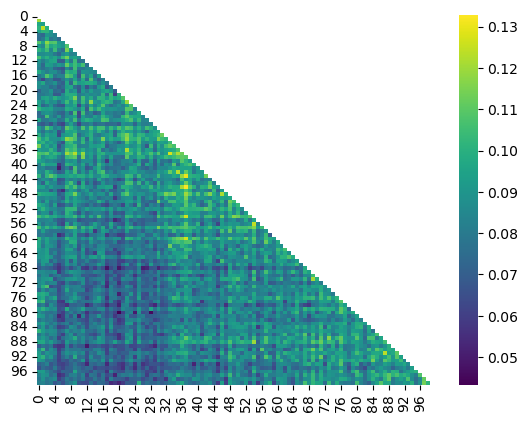

In [61]:
# i think this technically does what i want, but it's not quite helpful. I probably need to use a better comparison test
# and i definitely need to rethink how to display the data

mask = np.triu(np.ones_like(canto_jaccard_comparisons, dtype=bool))

test = canto_jaccard_comparisons[0]
test_mask = [True]*100
test_mask[0]=False

sns.heatmap(canto_jaccard_comparisons, cmap = 'viridis', mask=mask)
plt.show()


In [ ]:
# Cosine Similarity:

# This method represents each text as a vector in a high-dimensional space based on word frequencies.
# The cosine of the angle between these vectors is calculated, providing a measure of similarity.

# Jaccard Similarity:

# This method measures the similarity between two sets by comparing the intersection and union of their elements.
# It is particularly useful for comparing documents based on word overlap.

# Levenshtein Distance (Edit Distance):

# This measures the minimum number of single-character edits (insertions, deletions, or substitutions) required to change one text into the other.
# Lower values indicate higher similarity.

# TF-IDF (Term Frequency-Inverse Document Frequency):

# This method takes into account the importance of words in a document relative to their frequency across multiple documents.
# It can be used to represent documents as vectors and measure their similarity.

# Word Embeddings:

# Using pre-trained word embeddings (such as Word2Vec, GloVe, or FastText) to represent words in a continuous vector space.
# The similarity between texts can be measured using the similarity between their respective word embeddings.

# Semantic Similarity Measures:

# Utilizing natural language processing (NLP) models that capture semantic meaning, like BERT or Universal Sentence Encoder.
# These models can provide more advanced measures of similarity by considering the context and meaning of words.

# Dice Coefficient:

# Similar to Jaccard similarity, this coefficient measures the similarity between two sets by considering the intersection and sum of elements.

In [12]:
# now let's try to grab all the quotations from the text
# we can worry about assigning who said what later
# there appears to be about 1100 quotations, so doing that manually would take a while
# almost all of them should be virgil/dante/beatrice so it shouldn't be that bad
# but the fact that it's in italian will slow me down
# maybe just do like 100 a day or something lol
# or get high af and do it
quotation_dict = {'quotation': [], 'speaker': [], 'cantica': [], 'canto': []}
quotation = ""
for i in range(len(df.word.values)):
    if df.iloc[i]["start_quote"] == 1:
        while(df.iloc[i]["end_quote"] == 0):
            quotation += df.iloc[i].word + " "
            i += 1
        quotation += df.iloc[i].word
        quotation_dict['quotation'].append(quotation)
        quotation_dict['cantica'].append(df.iloc[i].cantica)
        quotation_dict['canto'].append(df.iloc[i].canto)
        quotation_dict['speaker'].append("blank")
        quotation = ""
            
# it messes up a bit with nested quotes. I think it's because the triple nested quotes used << >> and I replaced them with " instead of '', mabye fix that later

In [13]:
# some of these are not actually quotations, but rather just words or phrases Dante puts in quotes, e.g. the very last "quote" in the list
quot = pd.DataFrame(quotation_dict)
quot.to_csv("../data/quotations.csv", index=False)

In [14]:
quot = pd.read_csv("../data/quotations.csv")
df2 = pd.read_csv("../data/commedia_cantos.csv")

In [15]:
# find percentage of each canto that is spoken
inf_quote_total = 0
for quote in quot.loc[quot["cantica"] == "Inferno"].quotation:
    inf_quote_total += len(quote.split())
inf_quote_percentage = inf_quote_total/(len(df.loc[df["cantica"] == "Inferno"]))
print(inf_quote_percentage)

purg_quote_total = 0
for quote in quot.loc[quot["cantica"] == "Purgatorio"].quotation:
    purg_quote_total += len(quote.split())
purg_quote_percentage = purg_quote_total/(len(df.loc[df["cantica"] == "Purgatorio"]))
print(purg_quote_percentage)

par_quote_total = 0
for quote in quot.loc[quot["cantica"] == "Paradiso"].quotation:
    par_quote_total += len(quote.split())
par_quote_percentage = par_quote_total/(len(df.loc[df["cantica"] == "Paradiso"]))
print(par_quote_percentage)

0.5021141001286844
0.514651790093183
0.6243470645272278


In [16]:
source = ColumnDataSource(df)
cantiche = ['Inferno', 'Purgatorio', 'Paradiso']
percentages = [inf_quote_percentage, purg_quote_percentage, par_quote_percentage]

# Create a new figure
p = figure(x_range=cantiche, y_range=(0,1), height=350, title="Percentage of Canto that is spoken",
           toolbar_location=None, tools="")

# Add the bar chart
p.vbar(x=cantiche, top=percentages, width=0.9)

# Customize the figure
p.xgrid.grid_line_color = None
# Display the chart
show(p)


# it's ugly, but it's doing the right thing...

# now figure out how to factor in the fact that inferno and purg. have significantly more quotations than par. 
# i.e. there are fewer speakers who speak more often

In [ ]:
# maybe make a line graph of percentage-spoken for the 100 cantos

<Axes: ylabel='Count'>

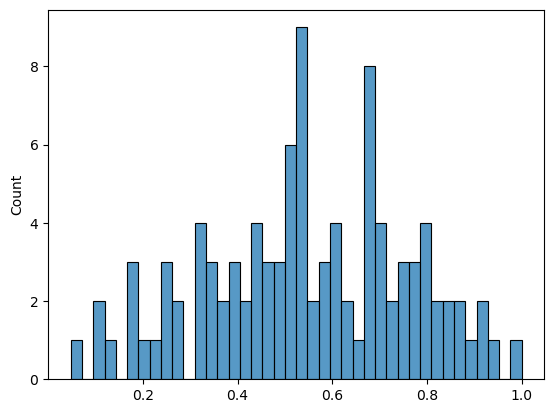

In [17]:
# maybe make a histogram of percentages on x-axis  and drop the cantos in. Could also color by cantica 
canto_quote_percentages = [0]*100
for i in range(34):
    canto_quote_total = 0
    for quote in quot.loc[(quot["cantica"] == "Inferno") & (quot["canto"] == i+1)].quotation:
        canto_quote_total += len(quote.split())
    canto_quote_percentage = canto_quote_total/int(df2.iloc[i]['num_words'])
    canto_quote_percentages[i] = canto_quote_percentage
    
for j in range(33):
    canto_quote_total = 0
    for quote in quot.loc[(quot["cantica"] == "Purgatorio") & (quot["canto"] == j+1)].quotation:
        canto_quote_total += len(quote.split())
    canto_quote_percentage = canto_quote_total/int(df2.iloc[j+34]['num_words'])
    canto_quote_percentages[j+34] = canto_quote_percentage
    
for k in range(33):
    canto_quote_total = 0
    for quote in quot.loc[(quot["cantica"] == "Paradiso") & (quot["canto"] == k+1)].quotation:
        canto_quote_total += len(quote.split())
    canto_quote_percentage = canto_quote_total/int(df2.iloc[k+67]['num_words'])
    canto_quote_percentages[k+67] = canto_quote_percentage

   
    
#sns.histplot(x = canto_quote_percentages, bins= 40) #that seems to work

In [19]:
df2["percent_spoken"] = canto_quote_percentages

In [20]:
df2.to_csv("../data/commedia_cantos.csv", index=False)